In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
df1 = pd.read_csv('/content/mental-and-substance-use-as-share-of-disease -AI.csv')
df2 = pd.read_csv('/content/prevalence-by-mental-and-substance-use-disorder.csv')

In [ ]:
numeric_columns = df1.select_dtypes(include=[np.number]).columns
df1[numeric_columns] = df1[numeric_columns].fillna(df1[numeric_columns].mean())

numeric_columns = df2.select_dtypes(include=[np.number]).columns
df2[numeric_columns] = df2[numeric_columns].fillna(df2[numeric_columns].mean())

In [ ]:
df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'] = df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].astype(float)
df2['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
df2['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)

In [ ]:
merged_df = pd.merge(df1, df2, on=['Entity', 'Code', 'Year'])

In [ ]:
X = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
               'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)']]

y = merged_df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

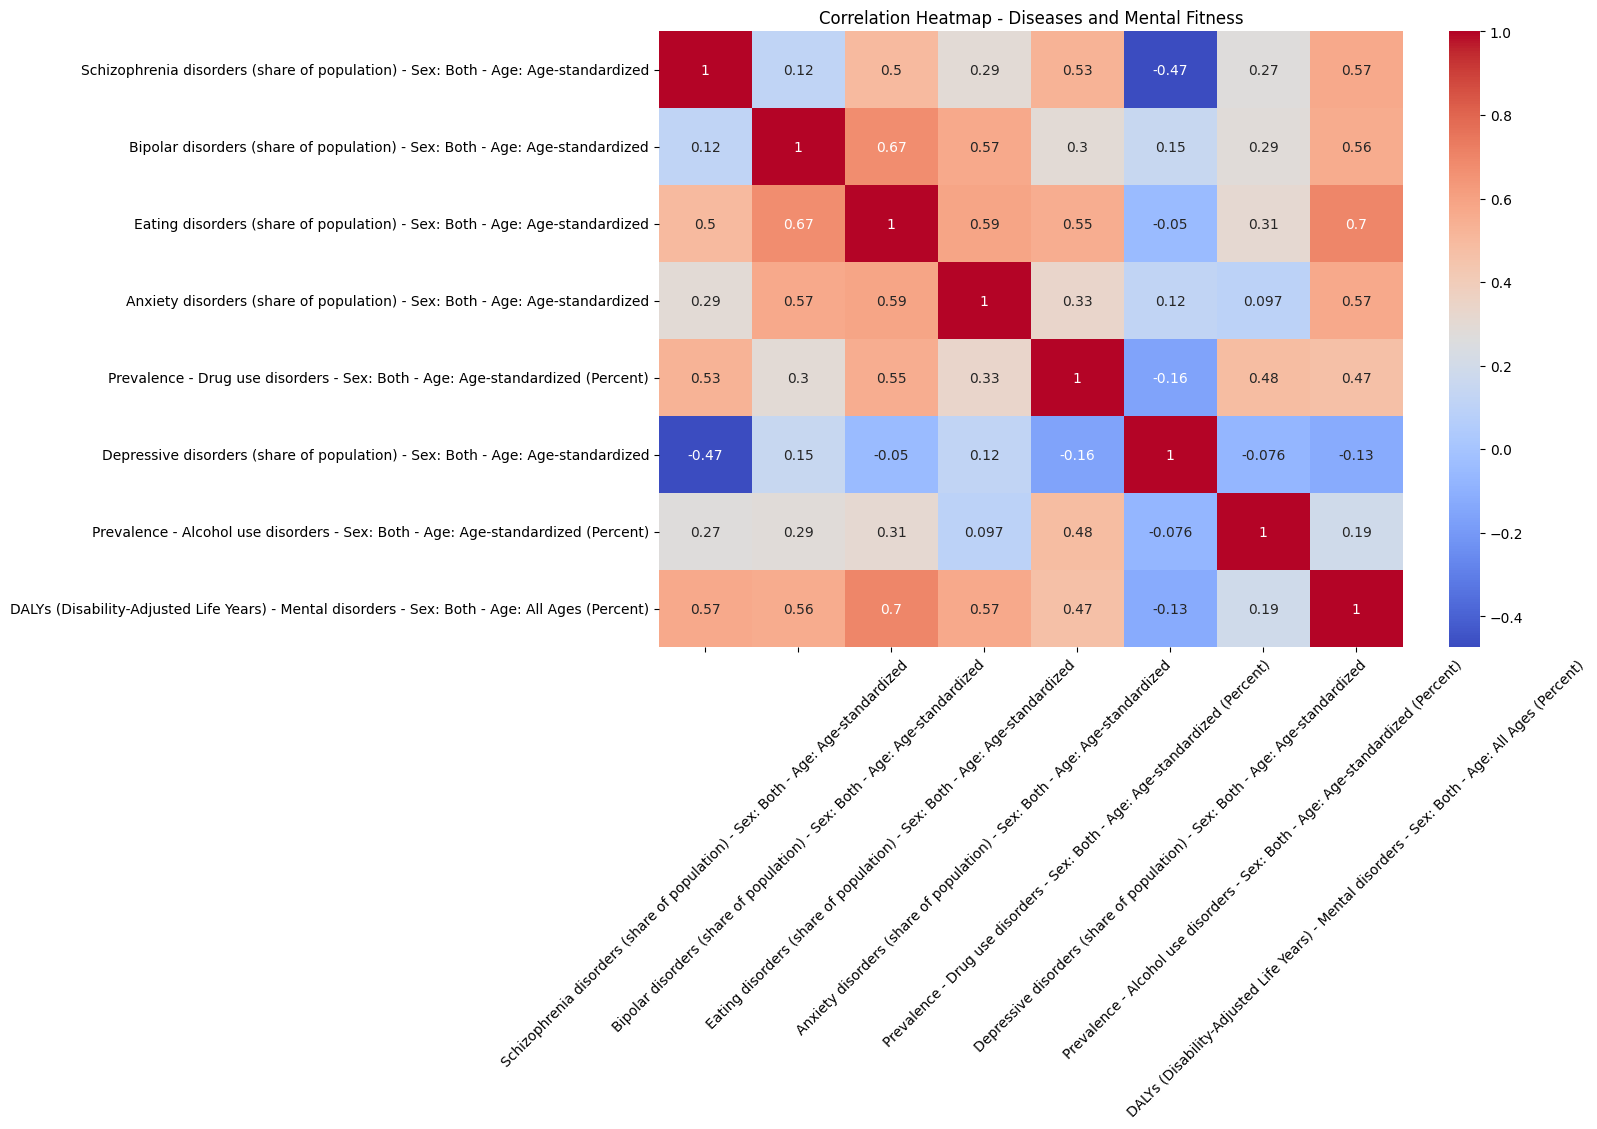

In [ ]:
# Compute the correlation matrix
corr_matrix = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'
                        ]].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Diseases and Mental Fitness')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Create a dictionary to store the model performance
model_performance = {}

# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
model_performance['1. Ridge Regression'] = {'MSE': ridge_mse, 'R-squared': ridge_r2}

# Lasso Regression
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
model_performance['2. Lasso Regression'] = {'MSE': lasso_mse, 'R-squared': lasso_r2}

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
elastic_net_y_pred = elastic_net_model.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_y_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_y_pred)
model_performance['3. Elastic Net Regression'] = {'MSE': elastic_net_mse, 'R-squared': elastic_net_r2}

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test)
poly_y_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_r2 = r2_score(y_test, poly_y_pred)
model_performance['4. Polynomial Regression'] = {'MSE': poly_mse, 'R-squared': poly_r2}

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
model_performance['5. Decision Tree Regression'] = {'MSE': tree_mse, 'R-squared': tree_r2}

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_y_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)
model_performance['6. Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2}

# SVR (Support Vector Regression)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
model_performance['7. Support Vector Regression'] = {'MSE': svr_mse, 'R-squared': svr_r2}

# XGBoost Regression
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
model_performance['8. XGBoost Regression'] = {'MSE': xgb_mse, 'R-squared': xgb_r2}

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
model_performance['9. K-Nearest Neighbors Regression'] = {'MSE': knn_mse, 'R-squared': knn_r2}

# Neural Network Regression
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)
model_performance['11. Neural Network Regression'] = {'MSE': nn_mse, 'R-squared': nn_r2}

# Print model performance
for model, performance in model_performance.items():
    print(f"Model: {model}")
    print("   Mean Squared Error (MSE):", performance['MSE'])
    print("   R-squared Score:", performance['R-squared'])
    print()

Model: 1. Ridge Regression
   Mean Squared Error (MSE): 2.011760777949562
   R-squared Score: 0.6025547895837084

Model: 2. Lasso Regression
   Mean Squared Error (MSE): 3.6885115313701666
   R-squared Score: 0.27129445122073637

Model: 3. Elastic Net Regression
   Mean Squared Error (MSE): 3.4562802296357646
   R-squared Score: 0.3171742693356677

Model: 4. Polynomial Regression
   Mean Squared Error (MSE): 1.2684893210831247
   R-squared Score: 0.7493961455782288

Model: 5. Decision Tree Regression
   Mean Squared Error (MSE): 0.09572736575540271
   R-squared Score: 0.9810880182960764

Model: 6. Random Forest Regression
   Mean Squared Error (MSE): 0.05705282823702591
   R-squared Score: 0.988728593592216

Model: 7. Support Vector Regression
   Mean Squared Error (MSE): 1.7972800620727118
   R-squared Score: 0.6449277865057355

Model: 8. XGBoost Regression
   Mean Squared Error (MSE): 0.09411257029693924
   R-squared Score: 0.981407038692439

Model: 9. K-Nearest Neighbors Regression


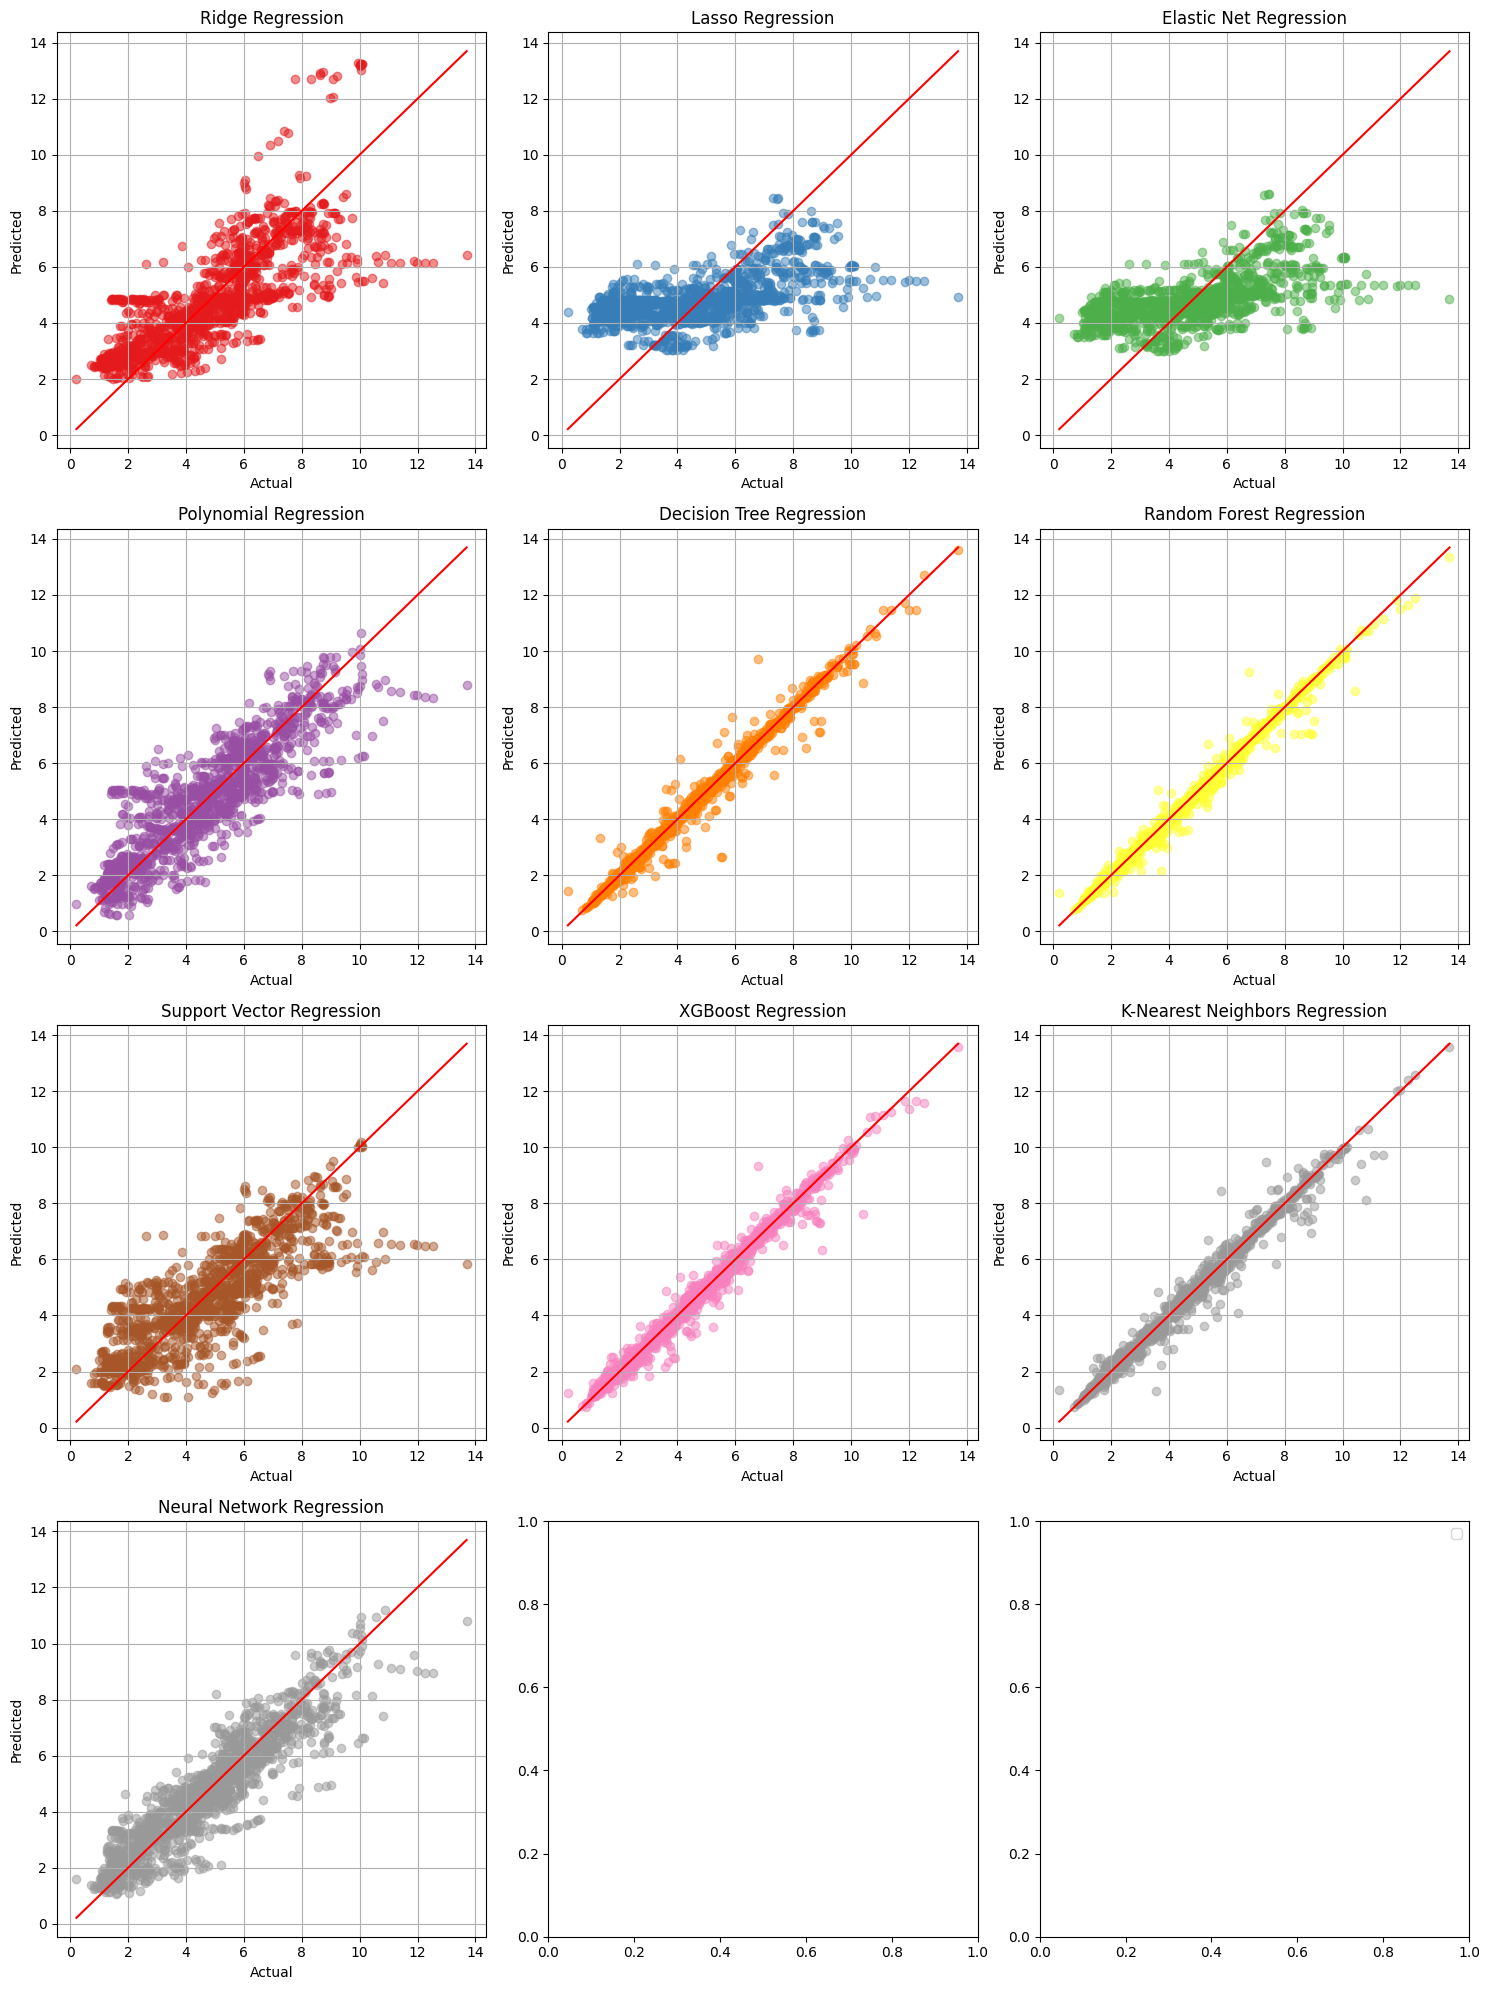

In [ ]:
# Create a dictionary to store the model performance
model_performance = {
    'Ridge Regression': {'Predicted': ridge_y_pred, 'Actual': y_test},
    'Lasso Regression': {'Predicted': lasso_y_pred, 'Actual': y_test},
    'Elastic Net Regression': {'Predicted': elastic_net_y_pred, 'Actual': y_test},
    'Polynomial Regression': {'Predicted': poly_y_pred, 'Actual': y_test},
    'Decision Tree Regression': {'Predicted': tree_y_pred, 'Actual': y_test},
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': y_test},
    'Support Vector Regression': {'Predicted': svr_y_pred, 'Actual': y_test},
    'XGBoost Regression': {'Predicted': xgb_y_pred, 'Actual': y_test},
    'K-Nearest Neighbors Regression': {'Predicted': knn_y_pred, 'Actual': y_test},
    'Neural Network Regression': {'Predicted': nn_y_pred, 'Actual': y_test}
}

# Set up figure and axes
num_models = len(model_performance)
num_rows = (num_models // 3) + (1 if num_models % 3 != 0 else 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Define color palette
color_palette = plt.cm.Set1(range(num_models))

# Iterate over the models and plot the predicted vs actual values
for i, (model, performance) in enumerate(model_performance.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Get the predicted and actual values
    y_pred = performance['Predicted']
    y_actual = performance['Actual']

    # Scatter plot of predicted vs actual values
    ax.scatter(y_actual, y_pred, color=color_palette[i], alpha=0.5, marker='o')

    # Add a diagonal line for reference
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')

    # Set the title and labels
    ax.set_title(model)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    # Add gridlines
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Create a legend
plt.legend(model_performance.keys(), loc='upper right')

# Show the plot
plt.show()

In [ ]:
# Store the regression models and their scores in a dictionary
regression_scores = {
    "Ridge Regression": (ridge_mse, ridge_r2),
    "Elastic Net Regression": (elastic_net_mse, elastic_net_r2),
    "Polynomial Regression": (poly_mse, poly_r2),
    "Random Forest Regression": (forest_mse, forest_r2),
    "Decision Tree Regression": (tree_mse, tree_r2),
    "Lasso Regression": (lasso_mse, lasso_r2),
    "Support Vector Regression": (svr_mse, svr_r2),
    "XGBoost Regression": (xgb_mse, xgb_r2),
    "K-Nearest Neighbors Regression": (knn_mse, knn_r2),
    "Neural Network Regression": (nn_mse, nn_r2),
}

# Sort the regression models based on MSE in ascending order and R-squared score in descending order
sorted_models = sorted(regression_scores.items(), key=lambda x: (x[1][0], -x[1][1]))

print("Regression Models in Order of Precision:")
for i, (model, scores) in enumerate(sorted_models, start=1):
    print(f"{i}. {model}")
    print("   Mean Squared Error (MSE):", scores[0])
    print("   R-squared Score:", scores[1])
    print()

most_precise_model = sorted_models[0][0]
least_precise_model = sorted_models[-1][0]

print(f"The most precise model is: {most_precise_model}")
print(f"The least precise model is: {least_precise_model}")

Regression Models in Order of Precision:
1. Random Forest Regression
   Mean Squared Error (MSE): 0.05705282823702591
   R-squared Score: 0.988728593592216

2. XGBoost Regression
   Mean Squared Error (MSE): 0.09411257029693924
   R-squared Score: 0.981407038692439

3. Decision Tree Regression
   Mean Squared Error (MSE): 0.09572736575540271
   R-squared Score: 0.9810880182960764

4. K-Nearest Neighbors Regression
   Mean Squared Error (MSE): 0.10412345048984495
   R-squared Score: 0.9794292804876206

5. Neural Network Regression
   Mean Squared Error (MSE): 0.8255812779110351
   R-squared Score: 0.8368974441138404

6. Polynomial Regression
   Mean Squared Error (MSE): 1.2684893210831247
   R-squared Score: 0.7493961455782288

7. Support Vector Regression
   Mean Squared Error (MSE): 1.7972800620727118
   R-squared Score: 0.6449277865057355

8. Ridge Regression
   Mean Squared Error (MSE): 2.011760777949562
   R-squared Score: 0.6025547895837084

9. Elastic Net Regression
   Mean Squar